# 环境说明

conda版本：https://mirrors.tuna.tsinghua.edu.cn/anaconda/archive/Anaconda3-2021.11-Windows-x86_64.exe


python核心包：
- bs4 == 0.0.1
- pandas == 1.3.4

# 资产负债表爬虫解析

## bs4解析

In [1]:
tmp_zcfz_url = 'https://data.eastmoney.com/bbsj/201806/zcfz.html'

### 获取内容

In [52]:
import requests

In [4]:
# bs4解析
page_content = requests.get(tmp_zcfz_url).text

In [10]:
len(page_content)

188630

### 携带请求头

F12查看zcfz.html

https://www.runoob.com/python3/python-requests.html

### bs4导入

In [53]:
from bs4 import BeautifulSoup

In [12]:
soup = BeautifulSoup(page_content)

### F12观察布局

### CSS选择器

CSS选择器：https://www.runoob.com/cssref/css-selectors.html

连选

### 子项再选

In [16]:
ul_list = soup.select('.mainnav-type ul')

In [18]:
len(ul_list)

1

In [21]:
len(ul_list[0].select('li'))

7

In [ ]:
len(ul_list[0].select('li'))

In [22]:
ul_list[0].select('li')

[<li><a href="http://data.eastmoney.com/center/">特色</a><a href="http://data.eastmoney.com/stock/lhb.html">龙虎榜单</a><a href="http://data.eastmoney.com/rzrq/">融资融券</a><a href="http://data.eastmoney.com/gpzy/">股权质押</a><a href="http://data.eastmoney.com/dzjy/default.html">大宗交易</a><a href="http://data.eastmoney.com/jgdy/">机构调研</a><a href="http://data.eastmoney.com/IF/Data/Contract.html?va=IF">期指持仓</a><a href="http://data.eastmoney.com/notices/">公告大全</a><a href="http://data.eastmoney.com/xuangu/">选股器</a></li>,
 <li><a href="http://data.eastmoney.com/bbsj/">财报</a><a href="http://data.eastmoney.com/bbsj/">业绩报表</a><a href="http://data.eastmoney.com/bbsj/yjyg.html">最新预告</a><a href="http://data.eastmoney.com/yjfp/">分红送配</a></li>,
 <li><a href="http://data.eastmoney.com/report/">研报</a><a href="http://data.eastmoney.com/report/stock.jshtml">个股研报</a><a href="http://data.eastmoney.com/report/industry.jshtml">行业研报</a><a href="http://data.eastmoney.com/report/profitforecast.jshtml">盈利预测</a></li>,
 <li><

### 子项数据获取

In [23]:
ul_list[0].select('li')[0]

<li><a href="http://data.eastmoney.com/center/">特色</a><a href="http://data.eastmoney.com/stock/lhb.html">龙虎榜单</a><a href="http://data.eastmoney.com/rzrq/">融资融券</a><a href="http://data.eastmoney.com/gpzy/">股权质押</a><a href="http://data.eastmoney.com/dzjy/default.html">大宗交易</a><a href="http://data.eastmoney.com/jgdy/">机构调研</a><a href="http://data.eastmoney.com/IF/Data/Contract.html?va=IF">期指持仓</a><a href="http://data.eastmoney.com/notices/">公告大全</a><a href="http://data.eastmoney.com/xuangu/">选股器</a></li>

In [24]:
a_list = ul_list[0].select('li')[0].select('a')
a_list

[<a href="http://data.eastmoney.com/center/">特色</a>,
 <a href="http://data.eastmoney.com/stock/lhb.html">龙虎榜单</a>,
 <a href="http://data.eastmoney.com/rzrq/">融资融券</a>,
 <a href="http://data.eastmoney.com/gpzy/">股权质押</a>,
 <a href="http://data.eastmoney.com/dzjy/default.html">大宗交易</a>,
 <a href="http://data.eastmoney.com/jgdy/">机构调研</a>,
 <a href="http://data.eastmoney.com/IF/Data/Contract.html?va=IF">期指持仓</a>,
 <a href="http://data.eastmoney.com/notices/">公告大全</a>,
 <a href="http://data.eastmoney.com/xuangu/">选股器</a>]

In [25]:
a_list[0]

<a href="http://data.eastmoney.com/center/">特色</a>

In [26]:
a_list[0].text

'特色'

到底谁是href，一个一个尝试太慢了，python通用的__dict__方法

In [27]:
a_list[0].__dict__

{'parser_class': bs4.BeautifulSoup,
 'name': 'a',
 'namespace': None,
 'prefix': None,
 'known_xml': False,
 'attrs': {'href': 'http://data.eastmoney.com/center/'},
 'contents': ['特色'],
 'parent': <li><a href="http://data.eastmoney.com/center/">特色</a><a href="http://data.eastmoney.com/stock/lhb.html">龙虎榜单</a><a href="http://data.eastmoney.com/rzrq/">融资融券</a><a href="http://data.eastmoney.com/gpzy/">股权质押</a><a href="http://data.eastmoney.com/dzjy/default.html">大宗交易</a><a href="http://data.eastmoney.com/jgdy/">机构调研</a><a href="http://data.eastmoney.com/IF/Data/Contract.html?va=IF">期指持仓</a><a href="http://data.eastmoney.com/notices/">公告大全</a><a href="http://data.eastmoney.com/xuangu/">选股器</a></li>,
 'previous_element': <li><a href="http://data.eastmoney.com/center/">特色</a><a href="http://data.eastmoney.com/stock/lhb.html">龙虎榜单</a><a href="http://data.eastmoney.com/rzrq/">融资融券</a><a href="http://data.eastmoney.com/gpzy/">股权质押</a><a href="http://data.eastmoney.com/dzjy/default.html">大宗交易</a

In [28]:
a_list[0].attrs

{'href': 'http://data.eastmoney.com/center/'}

In [29]:
a_list[0].attrs['href']

'http://data.eastmoney.com/center/'

### 不是真正的所见即所得

不是真正的所见即所得，需要配合selenium

## json解析

### F12找返回

前后端分离，是渲染后返回，还是返回后渲染

XHR 或者 JS 文件

### 找到并请求

JSON的全称是JavaScript Object Notation

In [30]:
import json
import pandas as pd

In [31]:
tmp_zcfz_api = 'https://datacenter-web.eastmoney.com/api/data/v1/get?callback=jQuery112302767833538878348_1667601318887&sortColumns=NOTICE_DATE%2CSECURITY_CODE&sortTypes=-1%2C-1&pageSize=50&pageNumber=1&reportName=RPT_DMSK_FN_BALANCE&columns=ALL&filter=(SECURITY_TYPE_CODE+in+("058001001"%2C"058001008"))(TRADE_MARKET_CODE!%3D"069001017")(REPORT_DATE%3D%272018-06-30%27)'

In [33]:
# 发现其实可以不加jquery
tmp_zcfz_api = 'https://datacenter-web.eastmoney.com/api/data/v1/get?&sortColumns=NOTICE_DATE%2CSECURITY_CODE&sortTypes=-1%2C-1&pageSize=50&pageNumber=1&reportName=RPT_DMSK_FN_BALANCE&columns=ALL&filter=(SECURITY_TYPE_CODE+in+("058001001"%2C"058001008"))(TRADE_MARKET_CODE!%3D"069001017")(REPORT_DATE%3D%272018-06-30%27)'

In [37]:
#接口直接解析，优势 ：能发现页面没有的东西
tmp_df = pd.DataFrame(json.loads(requests.get(tmp_zcfz_api).text)['result']['data'])

In [39]:
tmp_df

,SECUCODE,SECURITY_CODE,INDUSTRY_CODE,ORG_CODE,SECURITY_NAME_ABBR,INDUSTRY_NAME,MARKET,SECURITY_TYPE_CODE,TRADE_MARKET_CODE,DATE_TYPE_CODE,...,BORROW_FUND,BORROW_FUND_RATIO,AGENT_TRADE_SECURITY,ATS_RATIO,PREMIUM_RECE,PREMIUM_RECE_RATIO,SHORT_LOAN,SHORT_LOAN_RATIO,ADVANCE_PREMIUM,ADVANCE_PREMIUM_RATIO
0,002396.SZ,002396,016015,10077425,星网锐捷,通信设备,szzb,058001001,069001002001,002,...,None,None,None,None,None,None,None,None,None,None
1,002217.SZ,002217,016079,10059933,合力泰,光学光电子,szzb,058001001,069001002001,002,...,None,None,None,None,None,None,None,None,None,None
2,688283.SH,688283,016061,10528910,坤恒顺维,专用设备,kcb,058001001,069001001006,002,...,None,None,None,None,None,None,None,None,None,None
3,688292.SH,688292,016014,10468173,浩瀚深度,互联网服务,kcb,058001001,069001001006,002,...,None,None,None,None,None,None,None,None,None,None
4,603042.SH,603042,016015,10495153,华脉科技,通信设备,shzb,058001001,069001001001,002,...,None,None,None,None,None,None,None,None,None,None
5,002323.SZ,002323,016030,10145138,雅博股份,装修建材,szzb,058001001,069001002001,002,...,None,None,None,None,None,None,None,None,None,None
6,300311.SZ,300311,016057,10196296,任子行,软件开发,cyb,058001001,069001002002,002,...,None,None,None,None,None,None,None,None,None,None
7,301178.SZ,301178,016057,10493624,天亿马,软件开发,None,058001001,069001002002,002,...,None,None,None,None,None,None,None,None,None,None
8,300100.SZ,300100,016035,10137531,双林股份,汽车零部件,cyb,058001001,069001002002,002,...,None,None,None,None,None,None,None,None,None,None
9,600671.SH,600671,016081,10003981,ST目药,中药,shzb,058001001,069001001003,002,...,None,None,None,None,None,None,None,None,None,None


In [38]:
tmp_df.iloc[0, :]

SECUCODE                               002396.SZ
SECURITY_CODE                             002396
INDUSTRY_CODE                             016015
ORG_CODE                                10077425
SECURITY_NAME_ABBR                          星网锐捷
INDUSTRY_NAME                               通信设备
MARKET                                      szzb
SECURITY_TYPE_CODE                     058001001
TRADE_MARKET_CODE                   069001002001
DATE_TYPE_CODE                               002
REPORT_TYPE_CODE                             001
DATA_STATE                                     2
NOTICE_DATE                  2022-09-24 00:00:00
REPORT_DATE                  2018-06-30 00:00:00
TOTAL_ASSETS                       5909188090.59
FIXED_ASSET                         487215058.33
MONETARYFUNDS                       828635691.05
MONETARYFUNDS_RATIO                    13.498974
ACCOUNTS_RECE                       1633618054.8
ACCOUNTS_RECE_RATIO                    32.271949
INVENTORY           

In [54]:
# 结合网址去查看
zcfz_name2code_dict = {
    '股票代码': 'SECUCODE'
    ,'股票简称': 'SECURITY_NAME_ABBR'
    ,'行业名称': 'INDUSTRY_NAME'
    ,'公告日期': 'REPORT_DATE'
    ,'总资产': 'TOTAL_ASSETS'
    ,'固定资产': 'FIXED_ASSET'
    ,'货币资金': 'MONETARYFUNDS'
    ,'应收账款': 'ACCOUNTS_RECE'
    ,'存货': 'INVENTORY'
    ,'总负债': 'TOTAL_LIABILITIES'
    ,'应付账款': 'ACCOUNTS_PAYABLE'
    ,'预收账款': 'ADVANCE_RECEIVABLES'
    ,'所有者权益': 'TOTAL_EQUITY'
}
zcfz_code2name_dict = {v:k for k,v in zcfz_name2code_dict.items()}

In [41]:
tmp_df_filter = tmp_df.loc[:, zcfz_code2name_dict]

In [42]:
tmp_df_filter = tmp_df_filter.rename(columns=zcfz_code2name_dict)

## requests总结

不仅可以用来爬虫，还可以做接口测试

# 利润表

In [55]:
tmp_lrb_api = 'https://datacenter-web.eastmoney.com/api/data/v1/get?sortColumns=NOTICE_DATE%2CSECURITY_CODE&sortTypes=-1%2C-1&pageSize=500&pageNumber=8&reportName=RPT_DMSK_FN_INCOME&columns=ALL&filter=(SECURITY_TYPE_CODE+in+(%22058001001%22%2C%22058001008%22))(TRADE_MARKET_CODE!%3D%22069001017%22)(REPORT_DATE%3D%272018-06-30%27)'

In [56]:
#接口直接解析，优势 ：能发现页面没有的东西
tmp_df = pd.DataFrame(json.loads(requests.get(tmp_lrb_api).text)['result']['data'])
tmp_df.shape

(429, 46)

https://emweb.securities.eastmoney.com/PC_HSF10/FinanceAnalysis/Index?type=web&code=SZ002396#lrb-0

有个坑：净利润没有值

In [46]:
tmp_df.iloc[0,:]

SECUCODE                             002271.SZ
SECURITY_CODE                           002271
INDUSTRY_CODE                           016030
ORG_CODE                              10119110
SECURITY_NAME_ABBR                        东方雨虹
INDUSTRY_NAME                             装修建材
MARKET                                    szzb
SECURITY_TYPE_CODE                   058001001
TRADE_MARKET_CODE                 069001002001
DATE_TYPE_CODE                             002
REPORT_TYPE_CODE                           001
DATA_STATE                                   2
NOTICE_DATE                2019-08-09 00:00:00
REPORT_DATE                2018-06-30 00:00:00
PARENT_NETPROFIT                  618414793.65
TOTAL_OPERATE_INCOME             5613003955.89
TOTAL_OPERATE_COST               4908899553.27
TOE_RATIO                            32.776189
OPERATE_COST                     3540984885.03
OPERATE_EXPENSE                  3540984885.03
OPERATE_EXPENSE_RATIO                37.862962
SALE_EXPENSE 

In [47]:
# 结合网址去查看
lrb_name2code_dict = {
    '股票代码': 'SECUCODE'
    ,'股票简称': 'SECURITY_NAME_ABBR'
    ,'行业名称': 'INDUSTRY_NAME'
    ,'公告日期': 'REPORT_DATE'
    ,'营业收入': 'TOTAL_OPERATE_INCOME'
    ,'营业成本': 'OPERATE_COST'
    ,'销售费用': 'SALE_EXPENSE'
    ,'管理费用': 'MANAGE_EXPENSE'
    ,'财务费用': 'FINANCE_EXPENSE'
    ,'营业总支出': 'TOTAL_OPERATE_COST'
    ,'营业利润': 'OPERATE_PROFIT'
    ,'利润总额': 'TOTAL_PROFIT'
    ,'所得税费用': 'INCOME_TAX'
    ,'净利润': 'OPERATE_INCOME'
}
lrb_code2name_dict = {v:k for k,v in lrb_name2code_dict.items()}

In [48]:
tmp_df_filter = tmp_df.loc[:, lrb_code2name_dict]
tmp_df_filter = tmp_df_filter.rename(columns=lrb_code2name_dict)

In [49]:
tmp_df_filter

,股票代码,股票简称,行业名称,公告日期,营业收入,营业成本,销售费用,管理费用,财务费用,营业总支出,营业利润,利润总额,所得税费用,净利润
0,002271.SZ,东方雨虹,装修建材,2018-06-30 00:00:00,5.613004e+09,3.540985e+09,7.044169e+08,4.393908e+08,6.305287e+07,4.908900e+09,7.086214e+08,7.079801e+08,9.071969e+07,NaN
1,000962.SZ,东方钽业,小金属,2018-06-30 00:00:00,5.175089e+08,4.628046e+08,4.699835e+06,4.519304e+07,1.453015e+07,5.373698e+08,-1.915655e+07,-1.911814e+07,4.865427e+04,NaN
2,000793.SZ,华闻集团,文化传媒,2018-06-30 00:00:00,1.437139e+09,1.036539e+09,1.753124e+08,1.807353e+08,1.074690e+08,1.521074e+09,1.151382e+08,1.194329e+08,2.828683e+07,NaN
3,000791.SZ,甘肃电投,电力行业,2018-06-30 00:00:00,9.274491e+08,5.392176e+08,NaN,1.236103e+07,2.858467e+08,8.511282e+08,1.375362e+08,1.477749e+08,1.366941e+07,NaN
4,000779.SZ,甘咨询,工程咨询服务,2018-06-30 00:00:00,8.903767e+08,5.779261e+08,7.836212e+06,1.435605e+08,2.717787e+06,7.490202e+08,1.384960e+08,1.504722e+08,2.342021e+07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,301002.SZ,崧盛股份,电网设备,2018-06-30 00:00:00,1.926792e+08,1.427878e+08,8.385319e+06,4.917170e+06,1.567064e+05,1.680020e+08,2.607684e+07,2.607241e+07,3.260919e+06,NaN
423,301190.SZ,善水科技,化学制品,2018-06-30 00:00:00,2.092314e+08,1.069097e+08,3.205906e+06,1.799902e+07,2.060581e+05,1.370518e+08,7.287176e+07,7.960832e+07,1.164694e+07,NaN
424,300902.SZ,国安达,专用设备,2018-06-30 00:00:00,1.061279e+08,4.365951e+07,9.767434e+06,1.405172e+07,-8.965192e+04,7.406893e+07,3.302001e+07,3.308370e+07,4.686553e+06,NaN
425,688357.SH,建龙微纳,非金属材料,2018-06-30 00:00:00,1.802191e+08,1.213500e+08,1.281001e+07,5.933503e+06,8.298190e+06,1.561608e+08,2.457030e+07,2.446204e+07,3.348314e+06,NaN


# 循环获取

## 先简单进行函数封装

In [63]:
def get_zcfz_df(api, code2name_dict):
    zcfz_df = pd.DataFrame(json.loads(requests.get(api).text)['result']['data'])
    zcfz_df = zcfz_df.loc[:, code2name_dict]
    zcfz_df = zcfz_df.rename(columns=code2name_dict)
    return zcfz_df

In [64]:
def get_lrb_df(api, code2name_dict):
    lrb_df = pd.DataFrame(json.loads(requests.get(api).text)['result']['data'])
    lrb_df = lrb_df.loc[:, code2name_dict]
    lrb_df = lrb_df.rename(columns=code2name_dict)
    return lrb_df

In [65]:
zcfz_api = 'https://datacenter-web.eastmoney.com/api/data/v1/get?&sortColumns=NOTICE_DATE%2CSECURITY_CODE&sortTypes=-1%2C-1&'\
'pageSize=50&pageNumber=1&reportName=RPT_DMSK_FN_BALANCE&columns=ALL&filter=(SECURITY_TYPE_CODE+in+("058001001"%2C"058001008"))(TRADE_MARKET_CODE!%3D"069001017")'\
'(REPORT_DATE%3D%272018-06-30%27)'

In [66]:
get_zcfz_df(zcfz_api, code2name_dict=zcfz_code2name_dict)

,股票代码,股票简称,行业名称,公告日期,总资产,固定资产,货币资金,应收账款,存货,总负债,应付账款,预收账款,所有者权益
0,002396.SZ,星网锐捷,通信设备,2018-06-30 00:00:00,5.909188e+09,4.872151e+08,8.286357e+08,1.633618e+09,1.616253e+09,2.296649e+09,9.213075e+08,9.046966e+07,3.612539e+09
1,002217.SZ,合力泰,光学光电子,2018-06-30 00:00:00,2.484988e+10,3.104059e+09,2.932068e+09,6.330803e+09,3.838704e+09,1.415100e+10,3.067305e+09,9.165447e+07,1.069888e+10
2,688283.SH,坤恒顺维,专用设备,2018-06-30 00:00:00,5.614557e+07,3.481604e+06,3.898409e+06,NaN,1.410694e+07,1.379742e+07,NaN,2.169172e+06,4.234815e+07
3,688292.SH,浩瀚深度,互联网服务,2018-06-30 00:00:00,4.491499e+08,5.589526e+06,2.911328e+07,NaN,2.015240e+08,2.135899e+08,NaN,7.675781e+07,2.355600e+08
4,603042.SH,华脉科技,通信设备,2018-06-30 00:00:00,1.950402e+09,1.585586e+08,1.317277e+08,8.981480e+08,2.390261e+08,1.001849e+09,4.589113e+08,1.596035e+07,9.485532e+08
5,002323.SZ,雅博股份,装修建材,2018-06-30 00:00:00,2.446695e+09,2.134245e+07,5.126169e+06,8.412936e+08,8.863558e+08,1.642991e+09,5.325716e+08,5.825937e+06,8.037032e+08
6,300311.SZ,任子行,软件开发,2018-06-30 00:00:00,2.092129e+09,1.754737e+08,3.119926e+08,4.518731e+08,1.808518e+08,1.102903e+09,2.725822e+08,1.793280e+08,9.892258e+08
7,301178.SZ,天亿马,软件开发,2018-06-30 00:00:00,2.631616e+08,3.685644e+06,6.052771e+07,NaN,4.553602e+07,8.984870e+07,NaN,3.428491e+07,1.733129e+08
8,300100.SZ,双林股份,汽车零部件,2018-06-30 00:00:00,6.585758e+09,1.397232e+09,4.619158e+08,9.194790e+08,8.195325e+08,3.661225e+09,7.389265e+08,8.370922e+06,2.924533e+09
9,600671.SH,ST目药,中药,2018-06-30 00:00:00,4.479528e+08,1.429377e+08,1.424851e+07,6.284510e+07,6.318853e+07,3.408687e+08,4.727578e+07,2.231678e+06,1.070842e+08


## 观察很重要

In [ ]:
zcfz_api = 'https://datacenter-web.eastmoney.com/api/data/v1/get?&sortColumns=NOTICE_DATE%2CSECURITY_CODE&sortTypes=-1%2C-1&'\
'pageSize=50&pageNumber=1&reportName=RPT_DMSK_FN_BALANCE&columns=ALL&filter=(SECURITY_TYPE_CODE+in+("058001001"%2C"058001008"))(TRADE_MARKET_CODE!%3D"069001017")'\
'(REPORT_DATE%3D%272018-06-30%27)'

In [68]:
pageSize = 50
pageNumber = 1
REPORT_DATE = '2018-06-30'
zcfz_api = f'https://datacenter-web.eastmoney.com/api/data/v1/get?&sortColumns=NOTICE_DATE%2CSECURITY_CODE&sortTypes=-1%2C-1&'\
f'pageSize={pageSize}&pageNumber={pageNumber}&reportName=RPT_DMSK_FN_BALANCE&columns=ALL&filter=(SECURITY_TYPE_CODE+in+("058001001"%2C"058001008"))(TRADE_MARKET_CODE!%3D"069001017")'\
f'(REPORT_DATE%3D%27{REPORT_DATE}%27)'
zcfz_api

'https://datacenter-web.eastmoney.com/api/data/v1/get?&sortColumns=NOTICE_DATE%2CSECURITY_CODE&sortTypes=-1%2C-1&pageSize=50&pageNumber=1&reportName=RPT_DMSK_FN_BALANCE&columns=ALL&filter=(SECURITY_TYPE_CODE+in+("058001001"%2C"058001008"))(TRADE_MARKET_CODE!%3D"069001017")(REPORT_DATE%3D%272018-06-30%27)'

### 调整pageSize

In [ ]:
pageSize = 500  # 上限是500
pageNumber = 1
REPORT_DATE = '2018-06-30'
zcfz_api = f'https://datacenter-web.eastmoney.com/api/data/v1/get?&sortColumns=NOTICE_DATE%2CSECURITY_CODE&sortTypes=-1%2C-1&'\
f'pageSize={pageSize}&pageNumber={pageNumber}&reportName=RPT_DMSK_FN_BALANCE&columns=ALL&filter=(SECURITY_TYPE_CODE+in+("058001001"%2C"058001008"))(TRADE_MARKET_CODE!%3D"069001017")'\
f'(REPORT_DATE%3D%27{REPORT_DATE}%27)'

In [ ]:
get_zcfz_df(zcfz_api, code2name_dict=zcfz_code2name_dict)

### 不断调整pageNum

In [81]:
pageSize = 500  # 上限是500
pageNumber = 8  # 2018年时上限是8
REPORT_DATE = '2018-06-30'
zcfz_api = f'https://datacenter-web.eastmoney.com/api/data/v1/get?&sortColumns=NOTICE_DATE%2CSECURITY_CODE&sortTypes=-1%2C-1&'\
f'pageSize={pageSize}&pageNumber={pageNumber}&reportName=RPT_DMSK_FN_BALANCE&columns=ALL&filter=(SECURITY_TYPE_CODE+in+("058001001"%2C"058001008"))(TRADE_MARKET_CODE!%3D"069001017")'\
f'(REPORT_DATE%3D%27{REPORT_DATE}%27)'

In [82]:
get_zcfz_df(zcfz_api, code2name_dict=zcfz_code2name_dict)

,股票代码,股票简称,行业名称,公告日期,总资产,固定资产,货币资金,应收账款,存货,总负债,应付账款,预收账款,所有者权益
0,300105.SZ,龙源技术,电源设备,2018-06-30 00:00:00,2.233862e+09,1.507404e+08,3.198596e+08,4.363248e+08,1.797683e+08,2.960504e+08,1.438196e+08,5.526434e+07,1.937811e+09
1,300094.SZ,国联水产,食品饮料,2018-06-30 00:00:00,4.207269e+09,3.840040e+08,2.606931e+08,7.600013e+08,1.996505e+09,2.098277e+09,1.900299e+08,4.903737e+07,2.108992e+09
2,300081.SZ,恒信东方,通信服务,2018-06-30 00:00:00,2.616292e+09,3.691971e+07,8.041850e+08,2.576536e+08,2.110814e+08,1.802388e+08,7.161027e+07,6.394335e+06,2.436053e+09
3,300058.SZ,蓝色光标,文化传媒,2018-06-30 00:00:00,1.692816e+10,1.178640e+08,1.242228e+09,6.472749e+09,NaN,1.052914e+10,3.596262e+09,6.300965e+08,6.399019e+09
4,002912.SZ,中新赛克,互联网服务,2018-06-30 00:00:00,1.668935e+09,5.886304e+07,8.525062e+08,1.794191e+08,2.591202e+08,5.177192e+08,7.539904e+07,3.355321e+08,1.151216e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,603199.SH,九华旅游,旅游酒店,2018-06-30 00:00:00,1.218335e+09,6.265929e+08,5.870210e+07,1.743774e+07,5.827042e+06,1.501453e+08,3.899491e+07,6.136427e+06,1.068189e+09
358,603713.SH,密尔克卫,物流行业,2018-06-30 00:00:00,1.192818e+09,1.059911e+08,9.530315e+07,4.309494e+08,2.259453e+07,3.803581e+08,1.995526e+08,3.390742e+06,8.124597e+08
359,002462.SZ,嘉事堂,医药商业,2018-06-30 00:00:00,1.066171e+10,3.355537e+08,1.390606e+09,5.995777e+09,1.599565e+09,7.191068e+09,2.858789e+09,1.283003e+08,3.470639e+09
360,002565.SZ,顺灏股份,包装材料,2018-06-30 00:00:00,3.948272e+09,6.068767e+08,5.090348e+08,5.477976e+08,6.481708e+08,1.364892e+09,3.006833e+08,2.535495e+07,2.583380e+09


In [ ]:
pageSize = 500  # 上限是500
pageNumber = 9  # 2018年时上限是8
REPORT_DATE = '2018-06-30'
zcfz_api = f'https://datacenter-web.eastmoney.com/api/data/v1/get?&sortColumns=NOTICE_DATE%2CSECURITY_CODE&sortTypes=-1%2C-1&'\
f'pageSize={pageSize}&pageNumber={pageNumber}&reportName=RPT_DMSK_FN_BALANCE&columns=ALL&filter=(SECURITY_TYPE_CODE+in+("058001001"%2C"058001008"))(TRADE_MARKET_CODE!%3D"069001017")'\
f'(REPORT_DATE%3D%27{REPORT_DATE}%27)'
json.loads(requests.get(zcfz_api).text)

### 确定循环范围

In [83]:
report_date_list = ['2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31']
pageSize = 500
pageNumber_list = range(20) # 不会超过20了

## 异常抛出和等待

### 暴力的方式：报错捕获跳过

Python的异常处理：https://www.runoob.com/python3/python3-errors-execptions.html

In [88]:
pageSize = 500  # 上限是500
pageNumber = 9  # 2018年时上限是8
REPORT_DATE = '2018-06-30'
zcfz_api = f'https://datacenter-web.eastmoney.com/api/data/v1/get?&sortColumns=NOTICE_DATE%2CSECURITY_CODE&sortTypes=-1%2C-1&'\
f'pageSize={pageSize}&pageNumber={pageNumber}&reportName=RPT_DMSK_FN_BALANCE&columns=ALL&filter=(SECURITY_TYPE_CODE+in+("058001001"%2C"058001008"))(TRADE_MARKET_CODE!%3D"069001017")'\
f'(REPORT_DATE%3D%27{REPORT_DATE}%27)'

In [89]:
get_zcfz_df(zcfz_api, code2name_dict=zcfz_code2name_dict)

TypeError: 'NoneType' object is not subscriptable

In [87]:
for i in range(1, 100):
    pageSize = 500  # 上限是500
    pageNumber = i  # 2018年时上限是8
    REPORT_DATE = '2018-06-30'
    zcfz_api = f'https://datacenter-web.eastmoney.com/api/data/v1/get?&sortColumns=NOTICE_DATE%2CSECURITY_CODE&sortTypes=-1%2C-1&'\
    f'pageSize={pageSize}&pageNumber={pageNumber}&reportName=RPT_DMSK_FN_BALANCE&columns=ALL&filter=(SECURITY_TYPE_CODE+in+("058001001"%2C"058001008"))(TRADE_MARKET_CODE!%3D"069001017")'\
    f'(REPORT_DATE%3D%27{REPORT_DATE}%27)'
    try:
        get_zcfz_df(zcfz_api, code2name_dict=zcfz_code2name_dict)
    except Exception as e:
        print(i, '当前页码无数据')
        break

9 当前页码无数据


### 更优雅的方式：更新函数

In [ ]:
json.loads(requests.get(zcfz_api).text)['result']['data']

TypeError: 'NoneType' object is not subscriptable

In [95]:
def get_zcfz_df_v2(api, code2name_dict):
    res = json.loads(requests.get(api).text)['result']
    if res==None:  # 如果为空就不解析了
        return pd.DataFrame([])
    zcfz_df = pd.DataFrame(res['data'])
    zcfz_df = zcfz_df.loc[:, code2name_dict]
    zcfz_df = zcfz_df.rename(columns=code2name_dict)
    return zcfz_df

In [96]:
pd.DataFrame([]).shape

(0, 0)

In [97]:
for i in range(1, 100):
    pageSize = 500  # 上限是500
    pageNumber = i  # 2018年时上限是8
    REPORT_DATE = '2018-06-30'
    zcfz_api = f'https://datacenter-web.eastmoney.com/api/data/v1/get?&sortColumns=NOTICE_DATE%2CSECURITY_CODE&sortTypes=-1%2C-1&'\
    f'pageSize={pageSize}&pageNumber={pageNumber}&reportName=RPT_DMSK_FN_BALANCE&columns=ALL&filter=(SECURITY_TYPE_CODE+in+("058001001"%2C"058001008"))(TRADE_MARKET_CODE!%3D"069001017")'\
    f'(REPORT_DATE%3D%27{REPORT_DATE}%27)'
    zcfz_df = get_zcfz_df_v2(zcfz_api, code2name_dict=zcfz_code2name_dict)
    if zcfz_df.shape[0] == 0:
        print(i, '当前页码无数据')
        break

9 当前页码无数据


### 必要的等待：time.sleep

防止爬的太快把你断掉了

In [98]:
import time

In [99]:
for i in range(10):
    print(i)
    time.sleep(1)

0
1
2
3
4
5
6
7
8
9


## 整合代码

In [100]:
import json
import requests
import pandas as pd

In [101]:
# 结合网址去查看
zcfz_name2code_dict = {
    '股票代码': 'SECUCODE'
    ,'股票简称': 'SECURITY_NAME_ABBR'
    ,'行业名称': 'INDUSTRY_NAME'
    ,'公告日期': 'REPORT_DATE'
    ,'总资产': 'TOTAL_ASSETS'
    ,'固定资产': 'FIXED_ASSET'
    ,'货币资金': 'MONETARYFUNDS'
    ,'应收账款': 'ACCOUNTS_RECE'
    ,'存货': 'INVENTORY'
    ,'总负债': 'TOTAL_LIABILITIES'
    ,'应付账款': 'ACCOUNTS_PAYABLE'
    ,'预收账款': 'ADVANCE_RECEIVABLES'
    ,'所有者权益': 'TOTAL_EQUITY'
}
zcfz_code2name_dict = {v:k for k,v in zcfz_name2code_dict.items()}

In [102]:
# 结合网址去查看
lrb_name2code_dict = {
    '股票代码': 'SECUCODE'
    ,'股票简称': 'SECURITY_NAME_ABBR'
    ,'行业名称': 'INDUSTRY_NAME'
    ,'公告日期': 'REPORT_DATE'
    ,'营业收入': 'TOTAL_OPERATE_INCOME'
    ,'营业成本': 'OPERATE_COST'
    ,'销售费用': 'SALE_EXPENSE'
    ,'管理费用': 'MANAGE_EXPENSE'
    ,'财务费用': 'FINANCE_EXPENSE'
    ,'营业总支出': 'TOTAL_OPERATE_COST'
    ,'营业利润': 'OPERATE_PROFIT'
    ,'利润总额': 'TOTAL_PROFIT'
    ,'所得税费用': 'INCOME_TAX'
    ,'净利润': 'OPERATE_INCOME'
}
lrb_code2name_dict = {v:k for k,v in lrb_name2code_dict.items()}

In [103]:
report_date_list = ['2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31']
pageSize = 500
pageNumber_list = range(20) # 不会超过20了

In [104]:
def get_zcfz_df_v2(api, code2name_dict):
    res = json.loads(requests.get(api).text)['result']
    if res==None:  # 如果为空就不解析了
        return pd.DataFrame([])
    zcfz_df = pd.DataFrame(res['data'])
    zcfz_df = zcfz_df.loc[:, code2name_dict]
    zcfz_df = zcfz_df.rename(columns=code2name_dict)
    return zcfz_df

In [105]:
def get_lrb_df_v2(api, code2name_dict):
    res = json.loads(requests.get(api).text)['result']
    if res==None:  # 如果为空就不解析了
        return pd.DataFrame([])        
    lrb_df = pd.DataFrame(res['data'])
    lrb_df = lrb_df.loc[:, code2name_dict]
    lrb_df = lrb_df.rename(columns=code2name_dict)
    return lrb_df

In [107]:
total_zcfz_df = pd.DataFrame([])
for REPORT_DATE in report_date_list:
    print('开始获取', REPORT_DATE)
    for pageNumber in pageNumber_list:
            zcfz_api = f'https://datacenter-web.eastmoney.com/api/data/v1/get?&sortColumns=NOTICE_DATE%2CSECURITY_CODE&sortTypes=-1%2C-1&'\
    f'pageSize={pageSize}&pageNumber={pageNumber}&reportName=RPT_DMSK_FN_BALANCE&columns=ALL&filter=(SECURITY_TYPE_CODE+in+("058001001"%2C"058001008"))(TRADE_MARKET_CODE!%3D"069001017")'\
    f'(REPORT_DATE%3D%27{REPORT_DATE}%27)'
            tmp_zcfz_df = get_zcfz_df_v2(zcfz_api, code2name_dict=zcfz_code2name_dict)
            if tmp_zcfz_df.shape[0] == 0:
                break
            else:
                if total_zcfz_df.shape[0] == 0:
                    total_zcfz_df = tmp_zcfz_df
                else:
                    total_zcfz_df = pd.concat([total_zcfz_df, tmp_zcfz_df], axis=0)

开始获取 2017-12-31
开始获取 2018-12-31
开始获取 2019-12-31
开始获取 2020-12-31
开始获取 2021-12-31


In [108]:
total_zcfz_df.shape

(26879, 13)

In [109]:
total_lrb_df = pd.DataFrame([])
for REPORT_DATE in report_date_list:
    print('开始获取', REPORT_DATE)
    for pageNumber in pageNumber_list:
            lrb_api = f'https://datacenter-web.eastmoney.com/api/data/v1/get?sortColumns=NOTICE_DATE%2CSECURITY_CODE&sortTypes=-1%2C-1&'\
f'pageSize={pageSize}&pageNumber={pageNumber}&reportName=RPT_DMSK_FN_INCOME&columns=ALL&filter=(SECURITY_TYPE_CODE+in+(%22058001001%22%2C%22058001008%22))(TRADE_MARKET_CODE!%3D%22069001017%22)'\
f'(REPORT_DATE%3D%27{REPORT_DATE}%27)'
            tmp_lrb_df = get_lrb_df_v2(lrb_api, code2name_dict=lrb_code2name_dict)
            if tmp_lrb_df.shape[0] == 0:
                break
            else:
                if tmp_lrb_df.shape[0] == 0:
                    total_lrb_df = tmp_lrb_df
                else:
                    total_lrb_df = pd.concat([total_lrb_df, tmp_lrb_df], axis=0)

开始获取 2017-12-31
开始获取 2018-12-31
开始获取 2019-12-31
开始获取 2020-12-31
开始获取 2021-12-31


In [110]:
total_lrb_df.shape

(26906, 14)

# 杜邦分析法

In [112]:
total_zcfz_df

,股票代码,股票简称,行业名称,公告日期,总资产,固定资产,货币资金,应收账款,存货,总负债,应付账款,预收账款,所有者权益
0,002396.SZ,星网锐捷,通信设备,2017-12-31 00:00:00,6.439913e+09,4.844548e+08,1.731688e+09,1.521677e+09,1.362966e+09,2.690476e+09,9.378150e+08,6.744459e+07,3.749436e+09
1,002237.SZ,恒邦股份,贵金属,2017-12-31 00:00:00,1.343417e+10,3.613943e+09,1.317289e+09,1.253392e+07,4.846801e+09,8.876205e+09,1.556165e+09,3.274219e+08,4.557968e+09
2,000820.SZ,神雾节能,环保行业,2017-12-31 00:00:00,2.550938e+09,9.861318e+06,4.441687e+08,4.164500e+08,2.939347e+08,1.836391e+09,3.333251e+08,8.190880e+07,7.145473e+08
3,002776.SZ,ST柏龙,纺织服装,2017-12-31 00:00:00,2.561272e+09,1.512387e+08,1.247969e+09,1.461103e+08,1.060385e+08,6.506575e+08,4.251079e+07,3.698023e+06,1.910615e+09
4,600748.SH,上实发展,房地产开发,2017-12-31 00:00:00,3.869392e+10,9.757817e+07,9.410630e+09,1.383166e+09,1.942242e+10,2.756497e+10,1.212087e+09,8.353998e+09,1.112895e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,300325.SZ,德威退,塑料制品,2021-12-31 00:00:00,2.515615e+09,5.103316e+08,1.712263e+08,1.276471e+08,1.635077e+08,2.829299e+09,8.564501e+07,5.793591e+07,-3.136841e+08
375,002770.SZ,科迪退,食品饮料,2021-12-31 00:00:00,2.414398e+09,1.175702e+09,1.801607e+07,7.795656e+06,5.443509e+07,2.241976e+09,2.019216e+08,NaN,1.724227e+08
376,002260.SZ,德奥退,家电行业,2021-12-31 00:00:00,8.372433e+08,8.415270e+07,2.436602e+08,9.243759e+07,5.084700e+07,6.770779e+08,6.709732e+07,3.693987e+06,1.601655e+08
377,300178.SZ,腾邦退,旅游酒店,2021-12-31 00:00:00,4.169976e+09,2.082842e+08,8.016624e+07,1.193530e+08,3.480466e+07,5.518111e+09,2.619102e+08,6.411086e+07,-1.348135e+09


In [111]:
total_lrb_df

,股票代码,股票简称,行业名称,公告日期,营业收入,营业成本,销售费用,管理费用,财务费用,营业总支出,营业利润,利润总额,所得税费用,净利润
0,002396.SZ,星网锐捷,通信设备,2017-12-31 00:00:00,7.705136e+09,4.744432e+09,1.269197e+09,2.207531e+08,1.181273e+07,7.310361e+09,7.350730e+08,7.420438e+08,4.605915e+07,NaN
1,002237.SZ,恒邦股份,贵金属,2017-12-31 00:00:00,1.977557e+10,1.824637e+10,1.087449e+08,4.234824e+08,2.802913e+08,1.918515e+10,4.913524e+08,4.775052e+08,8.350815e+07,NaN
2,000820.SZ,神雾节能,环保行业,2017-12-31 00:00:00,8.602532e+08,4.352699e+08,1.597203e+07,8.855253e+07,1.713613e+07,7.255664e+08,1.338334e+08,1.418170e+08,4.350101e+07,NaN
3,002776.SZ,ST柏龙,纺织服装,2017-12-31 00:00:00,5.982642e+08,4.323342e+08,3.459928e+07,5.562735e+07,4.298285e+06,5.324685e+08,7.673908e+07,7.672014e+07,1.890867e+07,NaN
4,600748.SH,上实发展,房地产开发,2017-12-31 00:00:00,6.820828e+09,4.625509e+09,2.193115e+08,2.692916e+08,2.301748e+08,6.373211e+09,8.167063e+08,8.470115e+08,2.875447e+08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,300390.SZ,天华超净,能源金属,2021-12-31 00:00:00,3.397558e+09,1.661473e+09,3.854796e+07,1.432104e+08,3.774768e+07,1.948790e+09,1.469591e+09,1.470582e+09,2.195393e+08,NaN
406,300708.SZ,聚灿光电,光学光电子,2021-12-31 00:00:00,2.009197e+09,1.669936e+09,1.040123e+07,3.683446e+07,2.416264e+07,1.848742e+09,1.915223e+08,1.903143e+08,1.323771e+07,NaN
407,600272.SH,开开实业,医药商业,2021-12-31 00:00:00,6.698304e+08,4.928612e+08,8.322754e+07,8.631327e+07,5.574895e+06,6.736855e+08,2.572128e+07,2.462762e+07,8.250177e+06,NaN
408,300803.SZ,指南针,软件开发,2021-12-31 00:00:00,9.324210e+08,1.108948e+08,5.012724e+08,6.698356e+07,-2.470915e+07,7.689770e+08,1.903426e+08,1.896749e+08,1.347821e+07,NaN


## 对位计算准备：多重索引构建

### 多重索引的优势

利用多重索引计算，能解决单个索引解决不了的问题

In [123]:
>>> df1 = pd.DataFrame({'people': ['afan', 'afan', 'stella', 'stella'],
...                    'year': [2011, 2012, 2013, 2014],
...                    'sale': [55, 40, 84, 31],
                      })

>>> df2 = pd.DataFrame({'people': ['afan', 'afan', 'stella'],
...                    'year': [2011, 2012, 2014],
                       'net_income': [20, 10, 10],
                      })

In [124]:
df1

,people,year,sale
0,afan,2011,55
1,afan,2012,40
2,stella,2013,84
3,stella,2014,31


In [125]:
df2

,people,year,net_income
0,afan,2011,20
1,afan,2012,10
2,stella,2014,10


In [127]:
df1.set_index('people')['sale']

people
afan      55
afan      40
stella    84
stella    31
Name: sale, dtype: int64

In [128]:
df2.set_index('people')['net_income']

people
afan      20
afan      10
stella    10
Name: net_income, dtype: int64

In [130]:
>>> df2.set_index('people')['net_income'] / df1.set_index('people')['sale']

people
afan      0.363636
afan      0.500000
afan      0.181818
afan      0.250000
stella    0.119048
stella    0.322581
dtype: float64

In [131]:
df1.set_index(['year', 'people'])

,,sale
year,people,
2011,afan,55
2012,afan,40
2013,stella,84
2014,stella,31


In [31]:
 df1.set_index(['year', 'people'])['sale'] /  df2.set_index(['year', 'people'])['net_income']

year  people
2011  afan      2.75
2012  afan      4.00
2013  stella     NaN
2014  stella    3.10
dtype: float64

### 构建set_index

In [32]:
total_zcfz_df.head()

,股票代码,股票简称,行业名称,公告日期,总资产,固定资产,货币资金,应收账款,存货,总负债,应付账款,预收账款,所有者权益
0,002396.SZ,星网锐捷,通信设备,2017-12-31 00:00:00,6.439913e+09,4.844548e+08,1.731688e+09,1.521677e+09,1.362966e+09,2.690476e+09,9.378150e+08,6.744459e+07,3.749436e+09
1,002237.SZ,恒邦股份,贵金属,2017-12-31 00:00:00,1.343417e+10,3.613943e+09,1.317289e+09,1.253392e+07,4.846801e+09,8.876205e+09,1.556165e+09,3.274219e+08,4.557968e+09
2,000820.SZ,神雾节能,环保行业,2017-12-31 00:00:00,2.550938e+09,9.861318e+06,4.441687e+08,4.164500e+08,2.939347e+08,1.836391e+09,3.333251e+08,8.190880e+07,7.145473e+08
3,002776.SZ,ST柏龙,纺织服装,2017-12-31 00:00:00,2.561272e+09,1.512387e+08,1.247969e+09,1.461103e+08,1.060385e+08,6.506575e+08,4.251079e+07,3.698023e+06,1.910615e+09
4,600748.SH,上实发展,房地产开发,2017-12-31 00:00:00,3.869392e+10,9.757817e+07,9.410630e+09,1.383166e+09,1.942242e+10,2.756497e+10,1.212087e+09,8.353998e+09,1.112895e+10


In [132]:
total_zcfz_df_index = total_zcfz_df.set_index(['公告日期', '股票代码'])
total_zcfz_df_index.head()

股票简称   行业名称           总资产          固定资产  \
公告日期                股票代码                                                  
2017-12-31 00:00:00 002396.SZ   星网锐捷   通信设备  6.439913e+09  4.844548e+08   
                    002237.SZ   恒邦股份    贵金属  1.343417e+10  3.613943e+09   
                    000820.SZ   神雾节能   环保行业  2.550938e+09  9.861318e+06   
                    002776.SZ   ST柏龙   纺织服装  2.561272e+09  1.512387e+08   
                    600748.SH   上实发展  房地产开发  3.869392e+10  9.757817e+07   
...                              ...    ...           ...           ...   
2021-12-31 00:00:00 300325.SZ    德威退   塑料制品  2.515615e+09  5.103316e+08   
                    002770.SZ    科迪退   食品饮料  2.414398e+09  1.175702e+09   
                    002260.SZ    德奥退   家电行业  8.372433e+08  8.415270e+07   
                    300178.SZ    腾邦退   旅游酒店  4.169976e+09  2.082842e+08   
                    300201.SZ  *ST海伦   工程机械  2.329837e+09  3.585854e+08   

                                       货币资金          应收账款            存货  \
公告日期                股票代码                                                  
2017-12-31 00:00:00 002396.SZ  1.731688e+09  1.521677e+09  1.362966e+09   
                    002237.SZ  1.317289e+09  1.253392e+07  4.846801e+09   
                    000820.SZ  4.441687e+08  4.164500e+08  2.939347e+08   
                    002776.SZ  1.247969e+09  1.461103e+08  1.060385e+08   
                    600748.SH  9.410630e+09  1.383166e+09  1.942242e+10   
...                                     ...           ...           ...   
2021-12-31 00:00:00 300325.SZ  1.712263e+08  1.276471e+08  1.635077e+08   
                    002770.SZ  1.801607e+07  7.795656e+06  5.443509e+07   
                    002260.SZ  2.436602e+08  9.243759e+07  5.084700e+07   
                    300178.SZ  8.016624e+07  1.193530e+08  3.480466e+07   
                    300201.SZ  2.539929e+08  7.116661e+08  2.169490e+08   

                                        总负债          应付账款          预收账款  \
公告日期                股票代码                                                  
2017-12-31 00:00:00 002396.SZ  2.690476e+09  9.378150e+08  6.744459e+07   
                    002237.SZ  8.876205e+09  1.556165e+09  3.274219e+08   
                    000820.SZ  1.836391e+09  3.333251e+08  8.190880e+07   
                    002776.SZ  6.506575e+08  4.251079e+07  3.698023e+06   
                    600748.SH  2.756497e+10  1.212087e+09  8.353998e+09   
...                                     ...           ...           ...   
2021-12-31 00:00:00 300325.SZ  2.829299e+09  8.564501e+07  5.793591e+07   
                    002770.SZ  2.241976e+09  2.019216e+08           NaN   
                    002260.SZ  6.770779e+08  6.709732e+07  3.693987e+06   
                    300178.SZ  5.518111e+09  2.619102e+08  6.411086e+07   
                    300201.SZ  1.042089e+09  5.877885e+08           NaN   

                                      所有者权益  
公告日期                股票代码                     
2017-12-31 00:00:00 002396.SZ  3.749436e+09  
                    002237.SZ  4.557968e+09  
                    000820.SZ  7.145473e+08  
                    002776.SZ  1.910615e+09  
                    600748.SH  1.112895e+10  
...                                     ...  
2021-12-31 00:00:00 300325.SZ -3.136841e+08  
                    002770.SZ  1.724227e+08  
                    002260.SZ  1.601655e+08  
                    300178.SZ -1.348135e+09  
                    300201.SZ  1.287748e+09  

[26879 rows x 11 columns]

### 复原 reset_index

In [136]:
total_zcfz_df_index.reset_index()

,公告日期,股票代码,股票简称,行业名称,总资产,固定资产,货币资金,应收账款,存货,总负债,应付账款,预收账款,所有者权益
0,2017-12-31 00:00:00,002396.SZ,星网锐捷,通信设备,6.439913e+09,4.844548e+08,1.731688e+09,1.521677e+09,1.362966e+09,2.690476e+09,9.378150e+08,6.744459e+07,3.749436e+09
1,2017-12-31 00:00:00,002237.SZ,恒邦股份,贵金属,1.343417e+10,3.613943e+09,1.317289e+09,1.253392e+07,4.846801e+09,8.876205e+09,1.556165e+09,3.274219e+08,4.557968e+09
2,2017-12-31 00:00:00,000820.SZ,神雾节能,环保行业,2.550938e+09,9.861318e+06,4.441687e+08,4.164500e+08,2.939347e+08,1.836391e+09,3.333251e+08,8.190880e+07,7.145473e+08
3,2017-12-31 00:00:00,002776.SZ,ST柏龙,纺织服装,2.561272e+09,1.512387e+08,1.247969e+09,1.461103e+08,1.060385e+08,6.506575e+08,4.251079e+07,3.698023e+06,1.910615e+09
4,2017-12-31 00:00:00,600748.SH,上实发展,房地产开发,3.869392e+10,9.757817e+07,9.410630e+09,1.383166e+09,1.942242e+10,2.756497e+10,1.212087e+09,8.353998e+09,1.112895e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26874,2021-12-31 00:00:00,300325.SZ,德威退,塑料制品,2.515615e+09,5.103316e+08,1.712263e+08,1.276471e+08,1.635077e+08,2.829299e+09,8.564501e+07,5.793591e+07,-3.136841e+08
26875,2021-12-31 00:00:00,002770.SZ,科迪退,食品饮料,2.414398e+09,1.175702e+09,1.801607e+07,7.795656e+06,5.443509e+07,2.241976e+09,2.019216e+08,NaN,1.724227e+08
26876,2021-12-31 00:00:00,002260.SZ,德奥退,家电行业,8.372433e+08,8.415270e+07,2.436602e+08,9.243759e+07,5.084700e+07,6.770779e+08,6.709732e+07,3.693987e+06,1.601655e+08
26877,2021-12-31 00:00:00,300178.SZ,腾邦退,旅游酒店,4.169976e+09,2.082842e+08,8.016624e+07,1.193530e+08,3.480466e+07,5.518111e+09,2.619102e+08,6.411086e+07,-1.348135e+09


In [137]:
total_zcfz_df = total_zcfz_df_index.reset_index()

### 获取 loc两次

### 索引交换 swaplevel

不交换只能一层一层剥开它的索引

In [138]:
total_zcfz_df_index = total_zcfz_df.set_index(['公告日期', '股票代码'])

In [139]:
total_lrb_df_index = total_lrb_df.set_index(['公告日期', '股票代码'])

In [142]:
total_zcfz_df_index.loc['2021-12-31 00:00:00']

,股票简称,行业名称,总资产,固定资产,货币资金,应收账款,存货,总负债,应付账款,预收账款,所有者权益
股票代码,,,,,,,,,,,
688376.SH,美埃科技,环保行业,1.263493e+09,1.184056e+08,1.333633e+08,3.722458e+08,3.411116e+08,7.989122e+08,2.576968e+08,NaN,4.645811e+08
603130.SH,云中马,纺织服装,1.335698e+09,3.059372e+08,3.736742e+08,2.168760e+08,1.596310e+08,8.175257e+08,2.589460e+08,NaN,5.181727e+08
688489.SH,三未信安,电子元件,4.687408e+08,2.117952e+07,1.343006e+08,1.767098e+08,4.184802e+07,8.182332e+07,2.083729e+07,NaN,3.869175e+08
688419.SH,耐科装备,专用设备,3.828846e+08,5.100749e+07,8.196114e+07,6.420622e+07,1.125969e+08,1.984657e+08,8.628777e+07,84826.20,1.844189e+08
688362.SH,甬矽电子,半导体,4.632186e+09,3.077213e+09,2.951204e+08,3.961315e+08,2.788765e+08,3.259094e+09,5.627755e+08,NaN,1.373092e+09
...,...,...,...,...,...,...,...,...,...,...,...
300325.SZ,德威退,塑料制品,2.515615e+09,5.103316e+08,1.712263e+08,1.276471e+08,1.635077e+08,2.829299e+09,8.564501e+07,57935913.39,-3.136841e+08
002770.SZ,科迪退,食品饮料,2.414398e+09,1.175702e+09,1.801607e+07,7.795656e+06,5.443509e+07,2.241976e+09,2.019216e+08,NaN,1.724227e+08
002260.SZ,德奥退,家电行业,8.372433e+08,8.415270e+07,2.436602e+08,9.243759e+07,5.084700e+07,6.770779e+08,6.709732e+07,3693987.19,1.601655e+08


In [146]:
total_zcfz_df_index.swaplevel().loc['002396.SZ']

,股票简称,行业名称,总资产,固定资产,货币资金,应收账款,存货,总负债,应付账款,预收账款,所有者权益
公告日期,,,,,,,,,,,
2017-12-31 00:00:00,星网锐捷,通信设备,6.439913e+09,4.844548e+08,1.731688e+09,1.521677e+09,1.362966e+09,2.690476e+09,9.378150e+08,6.744459e+07,3.749436e+09
2017-12-31 00:00:00,星网锐捷,通信设备,6.439913e+09,4.844548e+08,1.731688e+09,1.521677e+09,1.362966e+09,2.690476e+09,9.378150e+08,6.744459e+07,3.749436e+09
2018-12-31 00:00:00,星网锐捷,通信设备,6.999109e+09,5.647691e+08,1.633702e+09,1.732376e+09,1.542495e+09,2.734762e+09,1.069377e+09,8.334161e+07,4.264346e+09
2018-12-31 00:00:00,星网锐捷,通信设备,6.999109e+09,5.647691e+08,1.633702e+09,1.732376e+09,1.542495e+09,2.734762e+09,1.069377e+09,8.334161e+07,4.264346e+09
2019-12-31 00:00:00,星网锐捷,通信设备,7.650634e+09,5.540331e+08,2.054035e+09,1.831114e+09,1.649794e+09,2.814118e+09,1.175606e+09,1.201577e+08,4.836516e+09
2019-12-31 00:00:00,星网锐捷,通信设备,7.650634e+09,5.540331e+08,2.054035e+09,1.831114e+09,1.649794e+09,2.814118e+09,1.175606e+09,1.201577e+08,4.836516e+09
2020-12-31 00:00:00,星网锐捷,通信设备,8.715630e+09,7.316542e+08,2.101200e+09,1.685647e+09,2.323741e+09,3.833001e+09,1.271083e+09,NaN,4.882629e+09
2020-12-31 00:00:00,星网锐捷,通信设备,8.715630e+09,7.316542e+08,2.101200e+09,1.685647e+09,2.323741e+09,3.833001e+09,1.271083e+09,NaN,4.882629e+09
2021-12-31 00:00:00,星网锐捷,通信设备,1.112296e+10,8.025267e+08,2.141405e+09,1.758021e+09,4.038957e+09,5.470682e+09,1.840501e+09,NaN,5.652276e+09


## 同期数据拼接：索引的结构变换

### 数据的偏移：shift

杜邦分析需要我们将一些指标进行期末和期初的平均，如ROE的所有者权益部分  
这就需要我们把同股票、不同年份的数据整体偏移1个单位，然后对位相加

In [164]:
>>> df1 = pd.DataFrame({'people': ['afan', 'afan', 'afan', 'stella', 'stella'],
...                    'year': [2011, 2012, 2013, 2013, 2014],
...                    'sale': [55, 40, 60, 84, 31],
                      })

In [165]:
df1

,people,year,sale
0,afan,2011,55
1,afan,2012,40
2,afan,2013,60
3,stella,2013,84
4,stella,2014,31


In [166]:
 df1[df1['people']=='afan']

,people,year,sale
0,afan,2011,55
1,afan,2012,40
2,afan,2013,60


In [167]:
tmp_df1 = df1[df1['people']=='afan'].set_index(['year', 'people'])
tmp_df1

,,sale
year,people,
2011,afan,55
2012,afan,40
2013,afan,60


In [169]:
tmp_df1.shift(1)

,,sale
year,people,
2011,afan,NaN
2012,afan,55.0
2013,afan,40.0


In [171]:
tmp_df1 + tmp_df1.shift(1) 

,,sale
year,people,
2011,afan,NaN
2012,afan,95.0
2013,afan,100.0


不能简单shift了

In [175]:
total_zcfz_df_index['固定资产'].shift(1)

公告日期                 股票代码     
2017-12-31 00:00:00  002396.SZ             NaN
                     002237.SZ    4.844548e+08
                     000820.SZ    3.613943e+09
                     002776.SZ    9.861318e+06
                     600748.SH    1.512387e+08
                                      ...     
2021-12-31 00:00:00  300325.SZ    5.516112e+08
                     002770.SZ    5.103316e+08
                     002260.SZ    1.175702e+09
                     300178.SZ    8.415270e+07
                     300201.SZ    2.082842e+08
Name: 固定资产, Length: 26879, dtype: float64

In [179]:
df1.set_index(['year', 'people']).unstack('people')

sale       
people  afan stella
year               
2011    55.0    NaN
2012    40.0    NaN
2013    60.0   84.0
2014     NaN   31.0

In [180]:
df1.set_index(['year', 'people']).unstack('people').shift(1)

sale       
people  afan stella
year               
2011     NaN    NaN
2012    55.0    NaN
2013    40.0    NaN
2014    60.0   84.0

In [182]:
total_zcfz_df_index['总资产']

公告日期                 股票代码     
2017-12-31 00:00:00  002396.SZ    6.439913e+09
                     002237.SZ    1.343417e+10
                     000820.SZ    2.550938e+09
                     002776.SZ    2.561272e+09
                     600748.SH    3.869392e+10
                                      ...     
2021-12-31 00:00:00  300325.SZ    2.515615e+09
                     002770.SZ    2.414398e+09
                     002260.SZ    8.372433e+08
                     300178.SZ    4.169976e+09
                     300201.SZ    2.329837e+09
Name: 总资产, Length: 26879, dtype: float64

In [183]:
total_zcfz_df_index['总资产'].unstack('股票代码')

ValueError: Index contains duplicate entries, cannot reshape

### 重复处理：drop_duplicates

起因：可能在输入页码循环获取信息的时候有重复页，其实就是第0页和第1页一样

In [184]:
total_zcfz_df_index['总资产'].shape

(26879,)

In [191]:
total_zcfz_df_index['总资产'].drop_duplicates()

公告日期                 股票代码     
2017-12-31 00:00:00  002396.SZ    6.439913e+09
                     002237.SZ    1.343417e+10
                     000820.SZ    2.550938e+09
                     002776.SZ    2.561272e+09
                     600748.SH    3.869392e+10
                                      ...     
2021-12-31 00:00:00  300325.SZ    2.515615e+09
                     002770.SZ    2.414398e+09
                     002260.SZ    8.372433e+08
                     300178.SZ    4.169976e+09
                     300201.SZ    2.329837e+09
Name: 总资产, Length: 24379, dtype: float64

In [189]:
total_zcfz_df_index['总资产'].drop_duplicates(subset=['公告日期', '股票代码'])

TypeError: drop_duplicates() got an unexpected keyword argument 'subset'

In [192]:
asset_series = total_zcfz_df_index['总资产']

In [194]:
asset_series.drop_duplicates()

公告日期                 股票代码     
2017-12-31 00:00:00  002396.SZ    6.439913e+09
                     002237.SZ    1.343417e+10
                     000820.SZ    2.550938e+09
                     002776.SZ    2.561272e+09
                     600748.SH    3.869392e+10
                                      ...     
2021-12-31 00:00:00  300325.SZ    2.515615e+09
                     002770.SZ    2.414398e+09
                     002260.SZ    8.372433e+08
                     300178.SZ    4.169976e+09
                     300201.SZ    2.329837e+09
Name: 总资产, Length: 24379, dtype: float64

In [186]:
26879 - 24379

2500

最准确的写法

In [197]:
total_zcfz_df_index['总资产'].reset_index().drop_duplicates(subset=['公告日期', '股票代码'])

,公告日期,股票代码,总资产
0,2017-12-31 00:00:00,002396.SZ,6.439913e+09
1,2017-12-31 00:00:00,002237.SZ,1.343417e+10
2,2017-12-31 00:00:00,000820.SZ,2.550938e+09
3,2017-12-31 00:00:00,002776.SZ,2.561272e+09
4,2017-12-31 00:00:00,600748.SH,3.869392e+10
...,...,...,...
26874,2021-12-31 00:00:00,300325.SZ,2.515615e+09
26875,2021-12-31 00:00:00,002770.SZ,2.414398e+09
26876,2021-12-31 00:00:00,002260.SZ,8.372433e+08
26877,2021-12-31 00:00:00,300178.SZ,4.169976e+09


In [208]:
total_zcfz_df_index_dropdu = total_zcfz_df_index.drop_duplicates()

In [209]:
total_zcfz_df_index_dropdu.shape

(24379, 11)

In [210]:
total_lrb_df_index_dropdu = total_lrb_df_index.drop_duplicates()

In [211]:
total_lrb_df_index_dropdu.shape

(24406, 12)

### 索引的行列转换：unstack

靠转置是不可以的

In [213]:
total_zcfz_df_index_dropdu['总资产']

公告日期                 股票代码     
2017-12-31 00:00:00  002396.SZ    6.439913e+09
                     002237.SZ    1.343417e+10
                     000820.SZ    2.550938e+09
                     002776.SZ    2.561272e+09
                     600748.SH    3.869392e+10
                                      ...     
2021-12-31 00:00:00  300325.SZ    2.515615e+09
                     002770.SZ    2.414398e+09
                     002260.SZ    8.372433e+08
                     300178.SZ    4.169976e+09
                     300201.SZ    2.329837e+09
Name: 总资产, Length: 24379, dtype: float64

In [217]:
total_zcfz_df_index_dropdu['总资产'].unstack('股票代码')

股票代码,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
公告日期,,,,,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00,3.248474e+12,1.165347e+12,2.688443e+08,2.912100e+09,1.313993e+10,4.426756e+08,1.067832e+10,2.710946e+10,3.105153e+09,5.393332e+09,...,1.302400e+08,2.010238e+08,4.292661e+08,1.636509e+08,4.435559e+08,6.263190e+08,7.677596e+08,1.506562e+10,7.792606e+10,1.952104e+09
2018-12-31 00:00:00,3.418592e+12,1.528579e+12,3.511775e+08,3.121423e+09,1.353673e+10,5.447100e+08,1.046636e+10,2.984980e+10,3.273278e+09,7.023355e+09,...,2.123277e+08,6.376933e+08,5.533392e+08,2.663177e+08,4.973249e+08,7.320165e+08,8.164974e+08,1.669096e+10,9.884487e+10,3.695630e+09
2019-12-31 00:00:00,3.939070e+12,1.729929e+12,1.494490e+09,3.031841e+09,1.574532e+10,5.336934e+08,1.204454e+10,3.020981e+10,4.291660e+09,1.077249e+10,...,4.045394e+08,1.168383e+09,7.256562e+08,3.733668e+08,7.386874e+08,8.514447e+08,8.380431e+08,1.795784e+10,1.148171e+11,3.309293e+09
2020-12-31 00:00:00,4.468514e+12,1.869177e+12,1.563563e+09,2.452795e+09,1.543476e+10,3.643940e+08,1.282831e+10,3.185662e+10,3.541730e+09,1.220736e+10,...,4.773500e+08,3.116324e+09,1.026291e+09,4.761995e+08,1.053228e+09,9.211211e+08,9.609821e+08,1.964312e+10,2.046017e+11,6.557638e+09
2021-12-31 00:00:00,4.921380e+12,1.938638e+12,1.110570e+09,2.474377e+09,2.360103e+10,4.320155e+08,1.237948e+10,3.707320e+10,4.587491e+09,1.482899e+10,...,8.406634e+08,3.090246e+09,1.827024e+09,9.608764e+08,4.452471e+09,1.797534e+09,1.536878e+09,2.667708e+10,2.299328e+11,7.672446e+09


In [219]:
total_zcfz_df_index_dropdu['总资产'].unstack('股票代码').shift(1)

股票代码,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
公告日期,,,,,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 00:00:00,3.248474e+12,1.165347e+12,2.688443e+08,2.912100e+09,1.313993e+10,4.426756e+08,1.067832e+10,2.710946e+10,3.105153e+09,5.393332e+09,...,1.302400e+08,2.010238e+08,4.292661e+08,1.636509e+08,4.435559e+08,6.263190e+08,7.677596e+08,1.506562e+10,7.792606e+10,1.952104e+09
2019-12-31 00:00:00,3.418592e+12,1.528579e+12,3.511775e+08,3.121423e+09,1.353673e+10,5.447100e+08,1.046636e+10,2.984980e+10,3.273278e+09,7.023355e+09,...,2.123277e+08,6.376933e+08,5.533392e+08,2.663177e+08,4.973249e+08,7.320165e+08,8.164974e+08,1.669096e+10,9.884487e+10,3.695630e+09
2020-12-31 00:00:00,3.939070e+12,1.729929e+12,1.494490e+09,3.031841e+09,1.574532e+10,5.336934e+08,1.204454e+10,3.020981e+10,4.291660e+09,1.077249e+10,...,4.045394e+08,1.168383e+09,7.256562e+08,3.733668e+08,7.386874e+08,8.514447e+08,8.380431e+08,1.795784e+10,1.148171e+11,3.309293e+09
2021-12-31 00:00:00,4.468514e+12,1.869177e+12,1.563563e+09,2.452795e+09,1.543476e+10,3.643940e+08,1.282831e+10,3.185662e+10,3.541730e+09,1.220736e+10,...,4.773500e+08,3.116324e+09,1.026291e+09,4.761995e+08,1.053228e+09,9.211211e+08,9.609821e+08,1.964312e+10,2.046017e+11,6.557638e+09


In [221]:
total_zcfz_df_index_dropdu['总资产'].unstack('股票代码').shift(1).stack('股票代码')

公告日期                 股票代码     
2018-12-31 00:00:00  000001.SZ    3.248474e+12
                     000002.SZ    1.165347e+12
                     000004.SZ    2.688443e+08
                     000005.SZ    2.912100e+09
                     000006.SZ    1.313993e+10
                                      ...     
2021-12-31 00:00:00  688799.SH    9.211211e+08
                     688800.SH    9.609821e+08
                     688819.SH    1.964312e+10
                     688981.SH    2.046017e+11
                     689009.SH    6.557638e+09
Length: 19500, dtype: float64

In [222]:
total_zcfz_df_index_dropdu['同期资产'] = total_zcfz_df_index_dropdu['总资产'].unstack('股票代码').shift(1).stack('股票代码')

C:\Users\lyf\AppData\Local\Temp/ipykernel_21112/3174964298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_zcfz_df_index_dropdu['同期资产'] = total_zcfz_df_index_dropdu['总资产'].unstack('股票代码').shift(1).stack('股票代码')


In [224]:
total_zcfz_df_index_dropdu['同期权益'] = total_zcfz_df_index_dropdu['所有者权益'].unstack('股票代码').shift(1).stack('股票代码')

C:\Users\lyf\AppData\Local\Temp/ipykernel_21112/967660727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_zcfz_df_index_dropdu['同期权益'] = total_zcfz_df_index_dropdu['所有者权益'].unstack('股票代码').shift(1).stack('股票代码')


### 数据透视：pivot

In [227]:
total_zcfz_df_index_dropdu.reset_index().head(5)

,公告日期,股票代码,股票简称,行业名称,总资产,固定资产,货币资金,应收账款,存货,总负债,应付账款,预收账款,所有者权益,同期资产,同期权益
0,2017-12-31 00:00:00,002396.SZ,星网锐捷,通信设备,6.439913e+09,4.844548e+08,1.731688e+09,1.521677e+09,1.362966e+09,2.690476e+09,9.378150e+08,6.744459e+07,3.749436e+09,NaN,NaN
1,2017-12-31 00:00:00,002237.SZ,恒邦股份,贵金属,1.343417e+10,3.613943e+09,1.317289e+09,1.253392e+07,4.846801e+09,8.876205e+09,1.556165e+09,3.274219e+08,4.557968e+09,NaN,NaN
2,2017-12-31 00:00:00,000820.SZ,神雾节能,环保行业,2.550938e+09,9.861318e+06,4.441687e+08,4.164500e+08,2.939347e+08,1.836391e+09,3.333251e+08,8.190880e+07,7.145473e+08,NaN,NaN
3,2017-12-31 00:00:00,002776.SZ,ST柏龙,纺织服装,2.561272e+09,1.512387e+08,1.247969e+09,1.461103e+08,1.060385e+08,6.506575e+08,4.251079e+07,3.698023e+06,1.910615e+09,NaN,NaN
4,2017-12-31 00:00:00,600748.SH,上实发展,房地产开发,3.869392e+10,9.757817e+07,9.410630e+09,1.383166e+09,1.942242e+10,2.756497e+10,1.212087e+09,8.353998e+09,1.112895e+10,NaN,NaN


In [229]:
total_zcfz_df_index_dropdu.reset_index().pivot(index='公告日期', columns='股票代码', values='固定资产')

股票代码,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
公告日期,,,,,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00,NaN,7.098808e+09,31220863.80,32886986.27,2928689.07,69828221.54,2.450931e+08,3.714895e+09,62794410.60,2.934690e+07,...,2192009.29,5466242.55,78790450.82,11601637.55,9.910288e+07,3.435797e+08,1.336948e+08,3.846080e+09,3.057225e+10,5.922205e+07
2018-12-31 00:00:00,NaN,1.153380e+10,990258.43,28128321.35,6677730.19,66456511.05,3.078395e+08,4.184108e+09,71030184.83,1.025170e+08,...,25787732.29,7389550.54,77617634.65,12882261.83,1.598711e+08,3.711053e+08,1.602191e+08,3.849908e+09,3.119536e+10,6.610298e+07
2019-12-31 00:00:00,NaN,1.239984e+10,2229822.41,30808639.13,13144374.38,60078260.28,4.438267e+08,4.663303e+09,44091955.90,9.355778e+07,...,24811531.16,12322953.08,92524473.45,17334319.40,1.910530e+08,3.600883e+08,1.574079e+08,4.219621e+09,3.686612e+10,1.041252e+08
2020-12-31 00:00:00,NaN,1.257734e+10,1992164.59,28262377.21,44081034.37,46220623.87,4.505120e+08,4.599721e+09,22823798.32,1.162339e+08,...,23573225.28,20369197.81,86419707.13,14954844.51,2.748446e+08,3.936599e+08,1.366550e+08,4.311153e+09,5.141500e+10,4.893379e+08
2021-12-31 00:00:00,NaN,1.282106e+10,2446998.74,25993036.39,42478976.98,46728899.22,4.126602e+08,4.928474e+09,18416480.53,1.141556e+08,...,24724986.09,24959231.54,77358707.29,17386997.05,4.405497e+08,4.299284e+08,1.515493e+08,4.646088e+09,6.536643e+10,5.894623e+08


## 真正的计算

### 补充净利润

净利润数据数据有缺失

In [232]:
total_lrb_df_index_dropdu['净利润'].isnull().sum()

24166

In [235]:
total_lrb_df_index_dropdu['净利润'] = total_lrb_df_index_dropdu['利润总额'] - total_lrb_df_index_dropdu['所得税费用']

C:\Users\lyf\AppData\Local\Temp/ipykernel_21112/3616160984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_lrb_df_index_dropdu['净利润'] = total_lrb_df_index_dropdu['利润总额'] - total_lrb_df_index_dropdu['所得税费用']


In [236]:
total_lrb_df_index_dropdu['净利润'].isnull().sum()

262

### ROE计算对比

杜邦分析：https://emweb.securities.eastmoney.com/PC_HSF10/FinanceAnalysis

In [238]:
total_lrb_df_index_dropdu['净利润'] / (total_zcfz_df_index_dropdu['所有者权益'] + total_zcfz_df_index_dropdu['同期权益']) * 2

公告日期                 股票代码     
2017-12-31 00:00:00  000001.SZ         NaN
                     000002.SZ         NaN
                     000004.SZ         NaN
                     000005.SZ         NaN
                     000006.SZ         NaN
                                    ...   
2021-12-31 00:00:00  688799.SH    0.150067
                     688800.SH    0.148570
                     688819.SH    0.133372
                     688981.SH    0.073795
                     689009.SH    0.102388
Length: 24412, dtype: float64

https://emweb.securities.eastmoney.com/PC_HSF10/FinanceAnalysis/Index?type=web&code=SH689009#dbfx-0

In [239]:
code = '689009.SH'
report_date = '2021-12-31 00:00:00'

In [240]:
total_lrb_df_index_dropdu.loc[report_date].loc[code]

股票简称                  九号公司
行业名称                  交运设备
营业收入         9146053585.08
营业成本         7021787925.51
销售费用          592434881.14
管理费用           520239557.5
财务费用           99420496.95
营业总支出    8773603139.549999
营业利润          510751407.75
利润总额          499620323.72
所得税费用          91619616.18
净利润           408000707.54
Name: 689009.SH, dtype: object

In [241]:
total_zcfz_df_index_dropdu.loc[report_date].loc[code]

股票简称              九号公司
行业名称              交运设备
总资产       7672446491.2
固定资产      589462328.82
货币资金     1726091997.43
应收账款      770937361.74
存货       2383256794.58
总负债      3399555413.77
应付账款     1931447866.55
预收账款               NaN
所有者权益    4272891077.43
同期资产     6557637541.93
同期权益     3696778410.72
Name: 689009.SH, dtype: object

### 三项分拆查看

利润率 = 净利润 / 营业总收入

In [242]:
408000707.54 / 9146053585.08 

0.04460948142765897

资产周转率 = 营业收入 / 资产

In [243]:
9146053585.08  / (7672446491.2 + 6557637541.93) * 2

1.2854532079763503

权益乘数 = 资产 / 所有者权益

In [244]:
7672446491.2 / 4272891077.43

1.7956101272337412

## 一个大合并

In [245]:
total_df = pd.concat([total_zcfz_df_index_dropdu, total_lrb_df_index_dropdu], axis=1)

In [246]:
total_df['净资产收益率'] = total_df['净利润'] / (total_df['所有者权益'] + total_df['同期权益']) * 2
total_df['利润率'] = total_df['净利润'] / total_df['营业收入']
total_df['资产周转率'] = total_df['营业收入'] / (total_df['总资产'] + total_df['同期资产']) * 2
total_df['权益乘数'] = total_df['总资产'] / total_df['所有者权益']

银行没有营业收入！

In [247]:
total_df.loc['2021-12-31 00:00:00'].loc['689009.SH']

股票简称                   九号公司
行业名称                   交运设备
总资产            7672446491.2
固定资产           589462328.82
货币资金          1726091997.43
应收账款           770937361.74
存货            2383256794.58
总负债           3399555413.77
应付账款          1931447866.55
预收账款                    NaN
所有者权益         4272891077.43
同期资产          6557637541.93
同期权益          3696778410.72
股票简称                   九号公司
行业名称                   交运设备
营业收入          9146053585.08
营业成本          7021787925.51
销售费用           592434881.14
管理费用            520239557.5
财务费用            99420496.95
营业总支出     8773603139.549999
营业利润           510751407.75
利润总额           499620323.72
所得税费用           91619616.18
净利润            408000707.54
净资产收益率             0.102388
利润率                0.044609
资产周转率              1.285453
权益乘数                1.79561
Name: 689009.SH, dtype: object

# 截面可视化分析

In [249]:
analysis_df = total_df.loc['2021-12-31 00:00:00']

## 缺失值统计

In [250]:
analysis_df['净资产收益率']

股票代码
000001.SZ    0.095674
000002.SZ    0.102528
000004.SZ   -0.422918
000005.SZ    0.099576
000006.SZ    0.069090
               ...   
688799.SH    0.150067
688800.SH    0.148570
688819.SH    0.133372
688981.SH    0.073795
689009.SH    0.102388
Name: 净资产收益率, Length: 4911, dtype: float64

In [251]:
analysis_df['净资产收益率'].isnull().sum()

69

存在缺失值，但是不多

In [252]:
analysis_df.loc[:, ['净资产收益率', '利润率', '资产周转率', '权益乘数']].describe() 

,净资产收益率,利润率,资产周转率,权益乘数
count,4842.000000,4872.000000,4877.000000,4879.000000
mean,0.035385,-10.658341,0.661804,2.388081
std,1.685564,735.811340,0.550507,5.182701
min,-73.540670,-51356.378095,0.000000,-52.947578
25%,0.030101,0.024555,0.361496,1.336325
50%,0.084256,0.080664,0.561562,1.687911
75%,0.143000,0.157122,0.812827,2.301894
max,24.264648,16.741226,11.452938,276.340096


## 重复索引处理

In [254]:
analysis_df.groupby('行业名称').agg({
    '净资产收益率': 'mean',
    '利润率': 'mean',            
    '资产周转率': 'mean',  
    '权益乘数': 'mean',  
})

ValueError: Grouper for '行业名称' not 1-dimensional

In [255]:
analysis_df.columns

Index(['股票简称', '行业名称', '总资产', '固定资产', '货币资金', '应收账款', '存货', '总负债', '应付账款',
       '预收账款', '所有者权益', '同期资产', '同期权益', '股票简称', '行业名称', '营业收入', '营业成本', '销售费用',
       '管理费用', '财务费用', '营业总支出', '营业利润', '利润总额', '所得税费用', '净利润', '净资产收益率',
       '利润率', '资产周转率', '权益乘数'],
      dtype='object')

In [256]:
analysis_df.drop(columns='行业名称').columns

Index(['股票简称', '总资产', '固定资产', '货币资金', '应收账款', '存货', '总负债', '应付账款', '预收账款',
       '所有者权益', '同期资产', '同期权益', '股票简称', '营业收入', '营业成本', '销售费用', '管理费用', '财务费用',
       '营业总支出', '营业利润', '利润总额', '所得税费用', '净利润', '净资产收益率', '利润率', '资产周转率',
       '权益乘数'],
      dtype='object')

In [258]:
analysis_df['行业名称'].iloc[:, 0]

股票代码
000001.SZ       银行
000002.SZ    房地产开发
000004.SZ     软件开发
000005.SZ     环保行业
000006.SZ    房地产开发
             ...  
688799.SH     化学制药
688800.SH     电子元件
688819.SH       电池
688981.SH      半导体
689009.SH     交运设备
Name: 行业名称, Length: 4911, dtype: object

In [260]:
hymc = analysis_df['行业名称'].iloc[:, 0].copy()
analysis_df = analysis_df.drop(columns='行业名称')
analysis_df['行业名称'] = hymc

C:\Users\lyf\AppData\Local\Temp/ipykernel_21112/3252943791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['行业名称'] = hymc


In [261]:
analysis_df.columns

Index(['股票简称', '总资产', '固定资产', '货币资金', '应收账款', '存货', '总负债', '应付账款', '预收账款',
       '所有者权益', '同期资产', '同期权益', '股票简称', '营业收入', '营业成本', '销售费用', '管理费用', '财务费用',
       '营业总支出', '营业利润', '利润总额', '所得税费用', '净利润', '净资产收益率', '利润率', '资产周转率',
       '权益乘数', '行业名称'],
      dtype='object')

## 行业聚合

In [262]:
industry_df = analysis_df.groupby('行业名称').agg({
    '净资产收益率': 'mean',
    '利润率': 'mean',            
    '资产周转率': 'mean',  
    '权益乘数': 'mean',  
                                     })

In [263]:
industry_df

,净资产收益率,利润率,资产周转率,权益乘数
行业名称,,,,
专业服务,0.106251,0.168984,0.546724,1.860796
专用设备,0.061328,0.066711,0.563403,2.009699
中药,-0.407737,0.044986,0.564092,1.523184
互联网服务,0.037983,-0.055142,0.619966,3.981657
交运设备,0.076309,0.076489,0.658983,1.792859
...,...,...,...,...
铁路公路,0.080429,0.344942,0.239865,2.132222
银行,0.104388,0.325553,0.025543,12.528014
非金属材料,0.180088,0.391918,0.552968,1.650144


### 净资产收益率

In [264]:
col = '净资产收益率'
industry_df.sort_values(by=col).head(10)

,净资产收益率,利润率,资产周转率,权益乘数
行业名称,,,,
医疗服务,-1.577918,0.031912,0.550014,3.259248
珠宝首饰,-1.320080,-0.825025,1.255139,2.608229
电子元件,-0.552516,0.112155,0.744475,1.567169
房地产服务,-0.421037,-0.025753,0.586678,3.109428
中药,-0.407737,0.044986,0.564092,1.523184
贵金属,-0.371735,0.005601,1.102198,0.961012
装修装饰,-0.200472,-0.145458,0.618859,3.702802
多元金融,-0.135020,-0.879302,0.180284,4.169069
教育,-0.127962,-0.518374,0.388277,7.301889


In [265]:
industry_df.sort_values(by=col).tail(10)

,净资产收益率,利润率,资产周转率,权益乘数
行业名称,,,,
煤炭行业,0.156620,0.107619,0.742998,2.670721
非金属材料,0.180088,0.391918,0.552968,1.650144
半导体,0.183254,0.197227,0.682239,1.525938
医疗器械,0.197099,0.220366,0.600497,1.363706
化纤行业,0.216375,0.084503,0.734593,1.849676
能源金属,0.232329,0.223160,0.759508,1.828595
化学原料,0.251092,0.158898,0.867955,1.825754
电网设备,0.267241,0.040612,0.718300,2.116998
化肥行业,0.280658,0.177985,0.873626,2.241918


In [266]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

<AxesSubplot:xlabel='行业名称'>

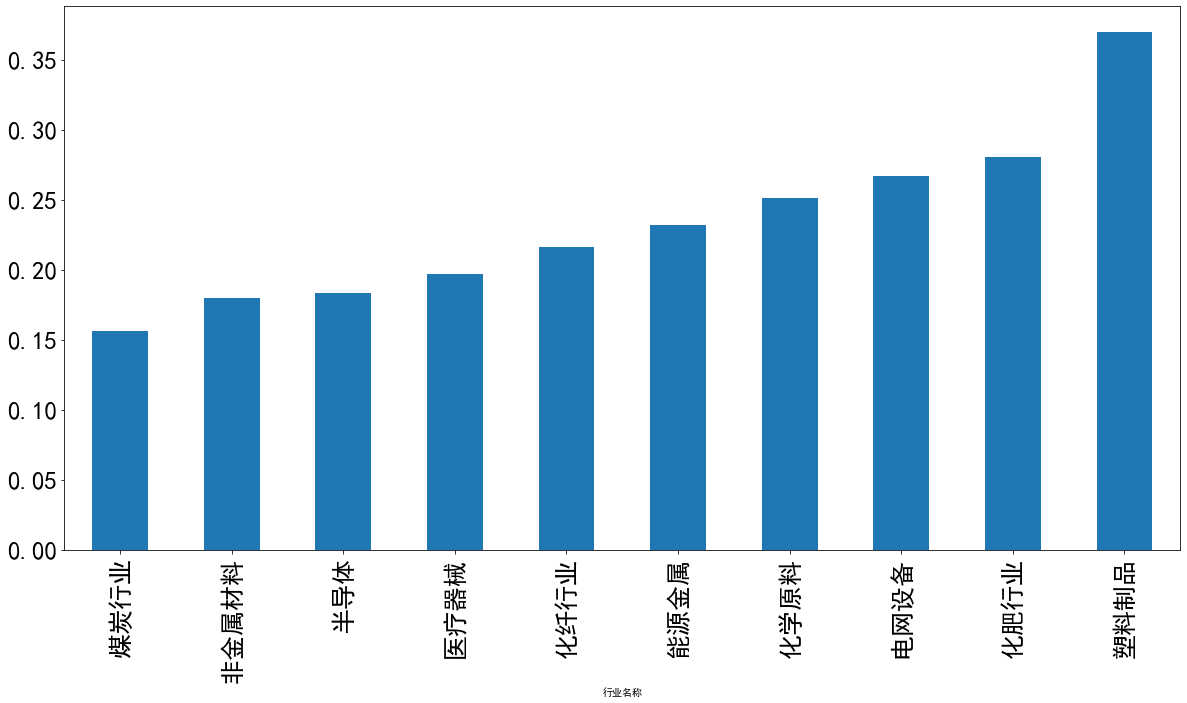

In [267]:
industry_df.sort_values(by=col).tail(10)['净资产收益率'].plot(kind='bar', figsize=(20,10), fontsize=25)

### 利润率

In [268]:
col = '利润率'
industry_df.sort_values(by=col).head(10)

,净资产收益率,利润率,资产周转率,权益乘数
行业名称,,,,
生物制品,0.114449,-951.398232,0.399385,1.771838
多元金融,-0.135020,-0.879302,0.180284,4.169069
珠宝首饰,-1.320080,-0.825025,1.255139,2.608229
教育,-0.127962,-0.518374,0.388277,7.301889
通信服务,-0.115475,-0.179684,0.618240,2.029962
旅游酒店,-0.010939,-0.174987,0.344102,2.642877
船舶制造,-0.034482,-0.172941,0.345275,1.894422
装修装饰,-0.200472,-0.145458,0.618859,3.702802
装修建材,-0.041266,-0.115341,0.771945,2.820240


In [269]:
industry_df.sort_values(by=col).tail(10)

,净资产收益率,利润率,资产周转率,权益乘数
行业名称,,,,
专业服务,0.106251,0.168984,0.546724,1.860796
航运港口,0.124894,0.174595,0.492365,1.810760
化肥行业,0.280658,0.177985,0.873626,2.241918
半导体,0.183254,0.197227,0.682239,1.525938
医疗器械,0.197099,0.220366,0.600497,1.363706
能源金属,0.232329,0.223160,0.759508,1.828595
证券,0.075200,0.261363,0.072527,4.165422
银行,0.104388,0.325553,0.025543,12.528014
铁路公路,0.080429,0.344942,0.239865,2.132222


### 权益乘数

In [270]:
col = '权益乘数'
industry_df.sort_values(by=col).head(10)

,净资产收益率,利润率,资产周转率,权益乘数
行业名称,,,,
贵金属,-0.371735,0.005601,1.102198,0.961012
仪器仪表,-0.114545,0.165114,0.516966,1.247954
医疗器械,0.197099,0.220366,0.600497,1.363706
美容护理,0.030784,0.112979,0.727185,1.493260
中药,-0.407737,0.044986,0.564092,1.523184
半导体,0.183254,0.197227,0.682239,1.525938
电子化学品,0.057509,0.072361,0.578077,1.532468
软件开发,0.066255,0.081074,0.531899,1.565296
电子元件,-0.552516,0.112155,0.744475,1.567169


In [271]:
industry_df.sort_values(by=col).tail(10)

,净资产收益率,利润率,资产周转率,权益乘数
行业名称,,,,
电力行业,0.040503,0.088238,0.323739,4.022331
证券,0.075200,0.261363,0.072527,4.165422
多元金融,-0.135020,-0.879302,0.180284,4.169069
汽车整车,0.058720,-0.071975,0.720720,4.582600
公用事业,0.037058,0.144786,0.310716,4.610335
房地产开发,-0.019568,0.023839,0.202356,4.803887
采掘行业,-0.076073,-0.048306,0.511499,5.155492
教育,-0.127962,-0.518374,0.388277,7.301889
保险,0.104164,0.060516,0.234120,8.318089


# 爬虫的使用的注意问题

## 不要乱爬

### 网页要求

### 法律要求

https://github.com/HiddenStrawberry/Crawler_Illegal_Cases_In_China


《关于办理非法利用信息网络、帮助信息网络犯罪活动等刑事案件适用法律若干问题的解释》（法释〔2019〕15号）  
第四条拒不履行信息网络安全管理义务，致使用户信息泄露，具有下列情形之一的，应当认定为刑法第二百八十六条之一第一款第二项规定的“造成严重后果”：
- （一）致使泄露行踪轨迹信息、通信内容、征信信息、财产信息五百条以上的；
- （二）致使泄露住宿信息、通信记录、健康生理信息、交易信息等其他可能影响人身、财产安全的用户信息五千条以上的；
- （三）致使泄露第一项、第二项规定以外的用户信息五万条以上的；

## 不要给服务器增加压力

网站开发者希望：更多人看，而不是一个人看更多

In [272]:
total_df.to_csv('2022-11-17 导出.csv')

## 爬虫的进阶

### 维护爬虫

网站可能更新，导致结构/接口变化

### IP池、cookie池

防止服务器限制

## 崔庆才推荐